In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Optimization of Functions
This week, we are going to discuss several more iterative methods.  However, instead of solving systems of equations we will be focused on optimization.  That is, we are going to discuss how to find the maxima and minima of a function.  As an example, suppose that we have the function $f(x) = x\cos(x)$.  We can define this in python with an anonymous function:

In [2]:
f = lambda x: x * np.cos(x)

This function has many maxima and minima, but we will focus on the range $x = 2$ to $x = 5$.  We can plot our function on that range with the following code: 

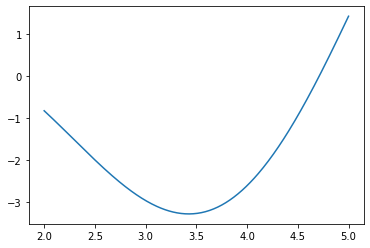

In [4]:
xplot = np.arange(2, 5.01, 0.01)
yplot = f(xplot)
plt.plot(xplot, yplot)

**Sidebar on plotting:** If I make a sequence of points solely for the purpose of making a graph, I will generally add "plot" to the variable names.  This is to indicate that we won't be using the variables `xplot` or `yplot` in our calculations, just to visualize the problem.  

We can see from the graph that this function has a minimum somewhere in the neighborhood of $x = 3.5$, and a maximum at $x = 5$.  This is an example of a rule you already know from calculus: If $f$ is a smooth function on the interval $[a, b]$, then its maxima and/or minima occur at critical poitns where $f'(x) = 0$, or at the end points of the interval.  We could find the minimum of $f$ on paper by finding all of the critical points of our function.  That is, we could solve $f'(x) = \cos(x) - x\sin(x) = 0$.  We would (at least in principle) find that there was one critical point $x^{*} \approx 3.4256$ between $x = 2$ and $x = 5$.  We could then check that $f''(x^{*}) > 0$ to confirm that $x^{*}$ was a minimum point and not a maximum or saddle.  

Unfortunately, even this relatively simple example turns out to be quite difficult.  The issue is that you cannot actually solve the equation $\cos(x) - x\sin(x) = 0$ analytically.  That is, you can't find a formula (more specifically, a formula without any infinite sums or limits) for the solution $x^{*}$.  The best we can hope for is to approximate our solution, which almost always means that we need an iterative method of some kind.  

There are two broad categories of methods for finding maxima/minima.  

1) Derivative based methods use the formula for one or more derivatives of $f(x)$.  These methods sometimes follow the spirit of our analytical method by calculating the function $f'(x)$ and then finding a zero of this function, but there are more complicated methods that somehow incorporate $f'(x)$ or $f''(x)$.  

2) Derivative free methods do not utilize $f'(x)$.  This often makes the method slower (at least in the sense of taking more iterations to converge) but it has the big advantage that we don't need to know what $f'(x)$ is.  (In fact, these methods typically work even if $f$ doesn't have a derivative.)

We will look at an example from each of these categories.  To make life easier, we will start by *only looking for minima*.  Later on, we will show how to easily modify our methods to find maxima.  We will also assume that our function has exactly one minimum and no other saddle points or maxima.  Of course, this isn't even true for our example function $f(x) = x\cos(x)$, but it is at least true on some small neighborhood of the minimum, such as the interval $[2, 5]$.  

# Derivative based methods
We will first look at a derivative based method.  Our main idea is to calculate (by hand) the function $f'(x)$ and then find where $f'(x) = 0$.  One of the basic requirements of any derivative based method is that we have access to the function $f'$, so we will assume that we know the formula for $f'(x)$.  

Once we have the formula for $f'(x)$, this is really just a question of how to find the zero of a function.  We already know one approach - the bisection method.  This means that we could just rename the function $f'(x) \equiv g(x)$ and use the bisection method to find a root.  Technically, this root would only be a critical point and not necessarily a minimum, but we are already assuming that $f$ only has one minimum and no other critical points, so the root we found with the bisection method would be our final answer.  

## Newton's method
Since we have already discussed the bisection method in some detail, we will instead look at a different root finding method called *Newton's method*.  To simplify our discussion, let's ignore the functions $f$ and $f'$ for the moment and just talk about how to find a zero of some arbitrary function $g(x)$.  Once we have worked out this method, we will set $g(x) = f'(x)$ to find the zero of $f'$.  

The main idea of Newton's method is the following: 

1) Make a guess for our root.  Let's call it x_0.  

2) If $g(x_0)$ is close enough to zero, we have successfully found the root and we can stop.  If it is not close enough to zero, continue to the next step.  

3) Find a linear approximation of $g(x)$ near $x_0$.  That is, find a formula for the tangent line of $g$ at $x_0$.  

4) Find the root of this tangent line.  That is, find where the tangent line crosses the $x$ axis.  

5) Use this new root as a guess for the zero of $g(x)$. Go back to step 2 and start again.  

Steps 1, 2 and 5 should be familiar, since they are essentially the same for all iterative methods.  The meat of the algorithm is in steps 3 and 4.  Remember from calculus that the tangent line of $g$ at $x_0$ is given by 

$g(x) \approx g(x_0) + g'(x_0)\cdot (x - x_0)$.  

We want to find out where $g(x) = 0$, so we should set 

$g(x_0) + g'(x_0) \cdot (x - x_0) = 0$.  

This is very easy to solve.  We get 

$x = x_0 - \frac{g(x_0)}{g'(x_0)}$.  

We have now fully specified our root finding algorithm.  To find a zero of $g(x)$, we make a guess $x_0$, then check if it is close enough to a root.  If it is not, then we find a new guess $x_1$ using the formula $x_1 = x_0 - g(x_0)/g'(x_0)$.  We then use $x_1$ in place of $x_0$ and start over.  

Right now, our algorithm only finds the zeros of a function $g$, not the minima of a function $f$.  However, it is easy to convert the method to find minima.  We want to find a zero of $f'(x)$, so we should replace $g(x)$ with $f'(x)$.  This means that we also need to replace $g'(x)$ with $f''(x)$.  

We therefore have the following algorithm: 

1) Make a guess for our minimum called $x_0$.  

2) Check if $f'(x_0)$ is sufficiently close to zero.  If it is, stop.  

3) Compute a new guess $x_1 = x_0 - f'(x_0) / f''(x_0)$.  

4) Replace $x_0$ with $x_1$ and start over at step 1.  

Steps 1, 2 and 4 are essentially the same in every iterative algorithm, so we can summarize this method by writing a formula for how to compute the $(k+1)$st guess from the $k$th guess:

$x_{k+1} = x_k - \frac{f'(x_k)}{f''(x-k)}$.  

(As a side note, if you look up "Newton's method" online, you will mostly find information about the root finding version.  To learn more about finding minima and maxima with this method, it is probably better to search for "Newton's method in optimization".)

## Newton's method example
Let's use Newton's method to find the minimum of $f(x) = x\cos(x)$ from our earlier example.  For this method, we need both $f'(x)$ and $f''(x)$.  These are 

$f'(x) = \cos(x) - x\sin(x)$ and

$f''(x) = -2\sin(x) - x\cos(x)$.  

We can write these as anonymous functions in python with 

In [5]:
fprime = lambda x: np.cos(x) - x * np.sin(x)
fdprime = lambda x: -2 * np.sin(x) - x * np.cos(x)

We also need to choose an initial guess $x_0$.  For illustrative purposes, let's choose $x_0 = 4.6$.  

In [6]:
x0 = 4.6

In addition, we need to specify a tolerance so that we can decide if $f'(x)$ is sufficiently close to zero.  

In [7]:
tolerance = 1e-8

We will follow the same pattern as we did with matrix splitting methods and save all of our guesses.  To that end, we should initialize an array that will hold each guess.  We don't know how many steps we will need, so let's arbitrarilly make a 1D array with 101 entries.  (I have chosen the numbers so that this will work out, but it is important to make sure that we initialize enough space for all of our guesses.  Otherwise, we will have to resize this array, which could slow down our code by a lot.)

In [9]:
X = np.zeros(101)
X[0] = x0

Now we are ready for the meat of our algorithm.  It should be clear from the setup of the problem that we will need a loop.  It is possible to write this code with either a for loop or a while loop, but we will use a for loop in this example.  The downside of using a for loop is that we have to choose a large enough maximum range for our loop, but the advantage is that we don't have to worry about resizing x.  It turns out that Newton's method rarely takes more than a few dozen steps (although the homework will explore some exceptions) and so it is probably safe to assume that the problem will take at most 100 steps.  This matches the size of the array we initialized above.  

In [10]:
for k in range(100):
    X[k + 1] = X[k] - fprime(X[k]) / fdprime(X[k])
    if np.abs(fprime(X[k + 1])) < tolerance:
        break

Finally, we should remove any extra zeros from the end of our array `X`.  

In [11]:
X = X[:(k+2)]
print(X)

[4.6        2.81880907 3.72252012 3.4357934  3.42564375 3.42561846]


It appears that this code finished after only 6 guesses.  To confirm that we have found the correct minimum, let's plot our guesses alongside the original function: 

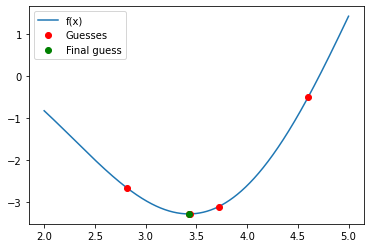

In [15]:
xplot = np.linspace(2, 5, 1000)
yplot = f(xplot)
plt.plot(xplot, yplot, X[:-1], f(X[:-1]), 'ro', X[-1], f(X[-1]), 'go')
plt.legend(("f(x)", "Guesses", "Final guess"), loc="best")

Notice that the plot command graphs f using the same system we described at the beginning of the notes, then plots our guesses in red dots, then plots the final guess as a green dot.  The last line adds a legend to the graph.  

## Problems with Newton's method
Newton's method is usually very fast.  We saw in the previous example that the method converged after only six guesses, and it turns out that this is fairly typical.  However, there are cases where the method has some serious flaws.  

One issue is that it is possible to find functions where Newton's method is arbitrarilly slow.  That is, you can pick any number of steps and it is possible to come up with a function and a reasonable initial guess so that Newton's method will take more than that many steps to converge.  Most "reasonable" functions will be quite fast, but there is no guarantee of speed when using Newton's method.  One of the homework problems will explore this issue in more detail.  

Another very important issue is that Newton's method can converge to the wrong $x$ value.  For example, let's try the same code as above but with $x_0 = 5$.  

In [17]:
x0 = 5
X = np.zeros(101)
X[0] = x0

for k in range(100):
    X[k+1] = X[k] - fprime(X[k]) / fdprime(X[k])
    if np.abs(fprime(X[k + 1])) < tolerance:
        break
X = X[:(k+2)]
print(X)

[  5.          -5.16596816 -16.0738258  -15.76752873 -15.77128578
 -15.77128487]


You can see that our loop still "converged" after only six steps, but we got the somewhat strange solution $x^{*} \approx -15.7713$, which is nowhere close to the minimum we were looking for or our initial guess.  If we plot our solutions like before, we get this:

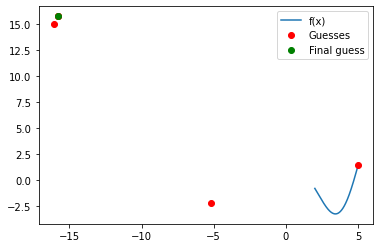

In [18]:
plt.plot(xplot, yplot, X[:-1], f(X[:-1]), 'ro', X[-1], f(X[-1]), 'go')
plt.legend(("f(x)", "Guesses", "Final guess"), loc="best")

To see what's going on, we need to look at the function $f(x)$ in the neighborhood of these guesses.  If we make `xplot` larger, we get the following graph:

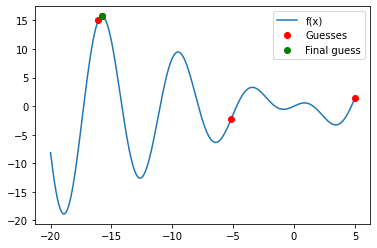

In [19]:
xplot = np.linspace(-20, 5, 1000)
yplot = f(xplot)
plt.plot(xplot, yplot, X[:-1], f(X[:-1]), 'ro', X[-1], f(X[-1]), 'go')
plt.legend(("f(x)", "Guesses", "Final guess"), loc="best")

The issue is that Newton's method finds a place where $f'(x) = 0$, but that $x$ value doesn't have to be close to your initial guess, and it doesn't even have to be a minimum.  In this case, we found a maximum value far to the left of our initial guess.  The problem can always be solved by choosing a better initial guess.  If $x_0$ is close enough to the minimum you are looking for, then Newton's method will always converge to that minimum.  However, if you start your guess too close to an inflection point (a place where $f''(x_0) = 0$), then you can converge to solutions in wildly different locations.  In this case, $f(x) = x\cos(x)$ has an inflection point at $x^{*} \approx 5.0870$, so if we make a guess close to $x_0 = 5$ then there is very little hope of finding the minimum we are hoping for.  

## Finding maxima
At the beginning of this section, we said that we would start by only looking for minima and then figure out how to alter our code to find maxima afterwards.  The last example showed exactly how to do this for Newton's method.  If you want to find a maximum with this method, you just need to choose an initial guess $x_0$ that is close to that maximum.  No other changes to the code are required.  For example, $f(x) = x\cos(x)$ has a maximum at $x^{*} \approx -3.4256$.  We can find this zero with Newton's method by choosing a guess sufficiently close to that maximum.  For example, 

In [20]:
x0 = -3
X = np.zeros(101)
X[0] = x0

for k in range(100):
    X[k+1] = X[k] - fprime(X[k]) / fdprime(X[k])
    if np.abs(fprime(X[k + 1])) < tolerance:
        break
X = X[:(k+2)]
print(X)

[-3.         -3.52585215 -3.42763849 -3.42561947 -3.42561846]


No other changes to the method are required.  